# <font color=green>Bibliotecas</font>

In [1]:
import pandas as pd

In [2]:
import seaborn as sn

# <font color=green>Conhecendo os dados e os tratando</font>

In [3]:
dados = pd.read_csv('/content/E-commerce Customer Behavior - Sheet1.csv')

In [4]:
dados.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [5]:
dados.shape

(350, 11)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


## Descobrir se temos alguma variável vazia ou NA

In [7]:
dados[dados == ''].sum()

,0
Customer ID,0.0
Gender,0
Age,0.0
City,0
Membership Type,0
Total Spend,0.0
Items Purchased,0.0
Average Rating,0.0
Discount Applied,0
Days Since Last Purchase,0.0


In [8]:
dados.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [9]:
dados[dados['Satisfaction Level'].isna()]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


## Tratando as linhas que contem NA

In [10]:
dados_limpos = dados.dropna().copy()
dados_limpos

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [11]:
dados_limpos.reset_index(drop = True, inplace = True)
dados_limpos

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
343,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
344,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
345,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
346,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


# <font color=green>Realizando análises descritivas</font>

In [12]:
dados_limpos.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [13]:
dados.shape

(350, 11)

Conseguimos ver com isso que em San Francisco e em New York temos a maior receita.

## O que podemos fazer para aumentar o nível de vendas dos nossos produtos online?

In [14]:
dados_limpos.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


#### O primeiro ponto seria definir o nosso público-alvo para assim podemos focar nossos produtos em um grupo que nos dará um maior retorno financeiro.

In [15]:
selecao = ['Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

Vamos, primeiro, tentar analisar as métricas quantitativas, agrupando-as pelas diferentes idades, com o objetivo de encontrar algum padrão para definirmos o nosso público-alvo no marketing.

In [16]:
media_idade = round(dados_limpos.groupby(['Age'])[selecao].mean(), 2)
media_idade

,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
Age,,,,
26,689.49,12.00,3.88,47.00
27,710.82,12.92,4.08,54.04
28,1492.18,21.00,4.90,10.08
29,1290.22,17.27,4.65,15.00
30,1325.65,17.90,4.68,17.12
31,1144.60,15.08,4.53,28.20
32,805.45,11.12,3.98,31.36
33,820.64,12.60,4.21,14.90
34,791.05,11.00,4.07,16.42


In [17]:
desvio_padrao = dados_limpos.groupby(['Age'])[selecao].std()
desvio_padrao

,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
Age,,,,
26,7.817360,0.000000,0.066667,0.500000
27,16.028412,0.400000,0.052281,8.512148
28,9.315329,0.000000,0.020412,1.100066
29,200.493400,1.618080,0.225227,12.457929
30,138.223622,1.937750,0.130856,4.970659
31,17.078251,0.400000,0.069041,3.752777
32,222.220628,1.798568,0.295836,6.153344
33,20.214087,0.843274,0.073786,1.663330
34,8.789617,0.000000,0.063702,1.585715


In [18]:
soma_por_idade = dados_limpos.groupby(['Age'])[['Total Spend', 'Items Purchased']].sum()
soma_por_idade

,Total Spend,Items Purchased
Age,,
26,6205.40,108
27,17770.50,323
28,35812.40,504
29,14192.40,190
30,63631.00,859
31,28615.00,377
32,26579.90,367
33,8206.40,126
34,18985.10,264


Estudando mais a fundo por que o desvio padrão é 0 para algumas das informações de "items purchased".

In [19]:
dados_limpos[dados_limpos['Age'] == 26]['Items Purchased']

,Items Purchased
16,12
34,12
64,12
93,12
123,12
164,12
194,12
205,12
235,12


In [20]:
dados_limpos[dados_limpos['Age'] == 28][['Items Purchased','City']]

,Items Purchased,City
9,21,San Francisco
27,21,San Francisco
45,21,San Francisco
57,21,San Francisco
74,21,San Francisco
86,21,San Francisco
104,21,San Francisco
116,21,San Francisco
134,21,San Francisco
145,21,San Francisco


In [21]:
dados_limpos[dados_limpos['Age'] == 34][['Items Purchased','City']]

,Items Purchased,City
1,11,Los Angeles
19,11,Los Angeles
37,11,Los Angeles
49,11,Los Angeles
67,11,Los Angeles
78,11,Los Angeles
96,11,Los Angeles
108,11,Los Angeles
126,11,Los Angeles
138,11,Los Angeles


In [22]:
dados_limpos[dados_limpos['Age'] == 38][['Items Purchased','City']]

,Items Purchased,City
17,8,Houston
35,8,Houston
65,8,Houston
94,8,Houston
124,8,Houston
165,8,Houston
195,8,Houston
206,8,Houston
236,8,Houston


Vimos nos dados que, realmente, o desvio padrão é 0 porque o número de itens comprados é o mesmo, junto com a mesma cidade.

In [23]:
df_age = pd.DataFrame({'Items Purchased Media' : media_idade['Items Purchased'],
                       'Items Purchased Desvio Padrao' : desvio_padrao['Items Purchased'],
                       'Items Purchased soma' : soma_por_idade['Items Purchased']})
df_age

,Items Purchased Media,Items Purchased Desvio Padrao,Items Purchased soma
Age,,,
26,12.00,0.000000,108
27,12.92,0.400000,323
28,21.00,0.000000,504
29,17.27,1.618080,190
30,17.90,1.937750,859
31,15.08,0.400000,377
32,11.12,1.798568,367
33,12.60,0.843274,126
34,11.00,0.000000,264


Ajeitando DataFrame column name

In [24]:
df_age.index.name = None
df_age.rename_axis('Age', axis = 'columns', inplace = True)

In [25]:
df_age

Age,Items Purchased Media,Items Purchased Desvio Padrao,Items Purchased soma
26,12.00,0.000000,108
27,12.92,0.400000,323
28,21.00,0.000000,504
29,17.27,1.618080,190
30,17.90,1.937750,859
31,15.08,0.400000,377
32,11.12,1.798568,367
33,12.60,0.843274,126
34,11.00,0.000000,264
35,11.80,1.000000,295


Agora, vamos organizar por qual faixa etária vendeu mais itens.

In [26]:
df_age.sort_values('Items Purchased soma', ascending = False)

Age,Items Purchased Media,Items Purchased Desvio Padrao,Items Purchased soma
30,17.90,1.937750,859
28,21.00,0.000000,504
31,15.08,0.400000,377
32,11.12,1.798568,367
27,12.92,0.400000,323
35,11.80,1.000000,295
34,11.00,0.000000,264
43,9.88,0.331662,247
41,9.04,0.204124,217
36,8.40,2.217356,210


Conseguimos ver que a faixa etária que mais compra na plataforma é a de pessoas com 30 anos, com um desvio padrão baixo. Isso significa um bom nível de consistência no número de itens comprados por idade. <br><br>Agora, faremos o mesmo esquema para o total gasto por idade.

In [27]:
df_age_spending = pd.DataFrame({'Total Spend Media' : media_idade['Total Spend'],
                       'Total Spend Desvio Padrao' : desvio_padrao['Total Spend'],
                       'Total Spend soma' : soma_por_idade['Total Spend']})
df_age_spending.rename_axis('Age', axis = 'columns', inplace = True)
df_age_spending

Age,Total Spend Media,Total Spend Desvio Padrao,Total Spend soma
26,689.49,7.817360,6205.40
27,710.82,16.028412,17770.50
28,1492.18,9.315329,35812.40
29,1290.22,200.493400,14192.40
30,1325.65,138.223622,63631.00
31,1144.60,17.078251,28615.00
32,805.45,222.220628,26579.90
33,820.64,20.214087,8206.40
34,791.05,8.789617,18985.10
35,800.09,73.312575,20002.20


In [28]:
df_age_spending.sort_values('Total Spend soma', ascending = False)

Age,Total Spend Media,Total Spend Desvio Padrao,Total Spend soma
30,1325.65,138.223622,63631.00
28,1492.18,9.315329,35812.40
31,1144.60,17.078251,28615.00
32,805.45,222.220628,26579.90
35,800.09,73.312575,20002.20
34,791.05,8.789617,18985.10
27,710.82,16.028412,17770.50
29,1290.22,200.493400,14192.40
43,507.95,6.304760,12698.75
36,500.91,192.033835,12522.80


Vemos que a faixa etária de 30 anos também ocupa a primeira colocação, com quase o dobro do segundo colocado. Em conclusão, o público-alvo deveria ser pessoas na faixa dos 30 anos, com uma variação de dois anos para cima e para baixo ao planejarmos uma campanha publicitária. <br><br>Agora, vamos descobrir qual seria o gênero do nosso público-alvo.

In [29]:
media_idade_gender = round(dados_limpos.groupby(['Gender'])[selecao].mean(), 2)
media_idade_gender

,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
Gender,,,,
Female,707.04,10.80,3.74,29.51
Male,986.93,14.44,4.31,23.75


In [30]:
desvio_padrao_gender = dados_limpos.groupby(['Gender'])[selecao].std()
desvio_padrao_gender

,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
Gender,,,,
Female,327.473923,3.324782,0.598949,8.916673
Male,340.170356,4.091707,0.389752,16.336430


In [31]:
soma_por_genero = dados_limpos.groupby(['Gender'])[selecao].sum()
soma_por_genero

,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
Gender,,,,
Female,122318.4,1869,646.5,5106
Male,172713.6,2527,753.7,4156


In [32]:
df_gender_purchased = pd.DataFrame({'Items Purchased Media' : media_idade_gender['Items Purchased'],
                       'Items Purchased Desvio Padrao' : desvio_padrao_gender['Items Purchased'],
                       'Items Purchased soma' : soma_por_genero['Items Purchased']})
df_gender_purchased.index.name = None
df_gender_purchased.rename_axis('Genero', axis = 'columns', inplace = True)
df_gender_purchased

Genero,Items Purchased Media,Items Purchased Desvio Padrao,Items Purchased soma
Female,10.80,3.324782,1869
Male,14.44,4.091707,2527


In [33]:
df_gender_spend = pd.DataFrame({'Total Spend Media' : media_idade_gender['Total Spend'],
                       'Total Spend Desvio Padrao' : desvio_padrao_gender['Total Spend'],
                       'Total Spend soma' : soma_por_genero['Total Spend']})
df_gender_spend.index.name = None
df_gender_spend.rename_axis('Genero', axis = 'columns', inplace = True)
df_gender_spend

Genero,Total Spend Media,Total Spend Desvio Padrao,Total Spend soma
Female,707.04,327.473923,122318.4
Male,986.93,340.170356,172713.6


Podemos ver, com essas observações, que os homens são, na verdade, os que tiveram, em média e no total, um maior número de compras no site, bem como o maior total gasto nele. Isso leva à conclusão de que o nosso público-alvo deveria ser composto principalmente por homens, mas não podemos esquecer as mulheres, já que elas têm um nível alto de influência na parte financeira da empresa

In [34]:
frequencia_Idade_gender = pd.crosstab(dados_limpos['Gender'],
                               dados_limpos['Age'])
frequencia_Idade_gender

Age,26,27,28,29,30,31,32,33,34,35,36,37,38,41,42,43
Gender,,,,,,,,,,,,,,,,
Female,0,0,0,2,24,24,9,0,0,1,24,22,9,24,9,25
Male,9,25,24,9,24,1,24,10,24,24,1,0,0,0,0,0


In [35]:
frequencia_Idade_gender_porcentagem = round(pd.crosstab(dados_limpos['Gender'],
                               dados_limpos['Age'], normalize = True), 4) * 100
frequencia_Idade_gender_porcentagem

Age,26,27,28,29,30,31,32,33,34,35,36,37,38,41,42,43
Gender,,,,,,,,,,,,,,,,
Female,0.00,0.00,0.0,0.57,6.9,6.90,2.59,0.00,0.0,0.29,6.90,6.32,2.59,6.9,2.59,7.18
Male,2.59,7.18,6.9,2.59,6.9,0.29,6.90,2.87,6.9,6.90,0.29,0.00,0.00,0.0,0.00,0.00


<font color=gold>Conclusão:
<br><br>O público-alvo a ser considerado em nossas campanhas publicitárias deve ser composto por homens na faixa etária dos 30 anos, com uma variação aceitável de no máximo 4 anos para cima ou para baixo, já que encontramos uma boa quantidade de homens nessa faixa etária em nosso grupo de dados.</font>

In [36]:
media_idade_city = round(dados_limpos.groupby(['City'])[selecao].mean(), 2)
media_idade_city

,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
City,,,,
Chicago,499.88,9.41,3.46,40.47
Houston,447.65,7.59,3.19,22.79
Los Angeles,805.49,11.68,4.17,15.27
Miami,690.39,11.64,3.93,45.50
New York,1165.04,15.27,4.54,24.59
San Francisco,1459.77,20.00,4.81,11.17


In [37]:
desvio_padrao_city = dados_limpos.groupby(['City'])[selecao].std()
desvio_padrao_city

,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
City,,,,
Chicago,15.277898,0.496814,0.139060,3.288553
Houston,17.560286,0.496416,0.155244,3.509542
Los Angeles,17.189484,0.705659,0.114215,2.242463
Miami,19.324829,1.410466,0.132179,10.089512
New York,24.611861,0.761815,0.107111,4.499497
San Francisco,42.241178,1.076055,0.096035,1.590961


#### O segundo passo deve ser identificar em quais cidades deveríamos focar nosso marketing para consolidar ainda mais a nossa plataforma online.

In [38]:
dados_limpos.value_counts('City')

,count
City,
Los Angeles,59
New York,59
Chicago,58
Miami,58
San Francisco,58
Houston,56


Já que a distribuição de clientes por cidade é semelhante, precisamos analisar mais a fundo. Portanto, vamos criar uma nova tabela semelhante à que já criamos.

In [39]:
dados_cidades_soma = dados_limpos.groupby('City')[selecao].sum().sort_values('Total Spend', ascending = False)
dados_cidades_soma

,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
City,,,,
San Francisco,84666.8,1160,278.9,648
New York,68737.1,901,268.1,1451
Los Angeles,47524.0,689,246.2,901
Miami,40042.6,675,227.8,2639
Chicago,28993.2,546,200.5,2347
Houston,25068.3,425,178.7,1276


In [40]:
dados_cidades_media = dados_limpos.groupby('City')[selecao].mean().sort_values('Total Spend', ascending = False)
dados_cidades_media

,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
City,,,,
San Francisco,1459.772414,20.000000,4.808621,11.172414
New York,1165.035593,15.271186,4.544068,24.593220
Los Angeles,805.491525,11.677966,4.172881,15.271186
Miami,690.389655,11.637931,3.927586,45.500000
Chicago,499.882759,9.413793,3.456897,40.465517
Houston,447.648214,7.589286,3.191071,22.785714


In [41]:
dados_cidades_desvio_padrao = dados_limpos.groupby('City')[selecao].std().sort_values('Total Spend', ascending = False)
dados_cidades_desvio_padrao

,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
City,,,,
San Francisco,42.241178,1.076055,0.096035,1.590961
New York,24.611861,0.761815,0.107111,4.499497
Miami,19.324829,1.410466,0.132179,10.089512
Houston,17.560286,0.496416,0.155244,3.509542
Los Angeles,17.189484,0.705659,0.114215,2.242463
Chicago,15.277898,0.496814,0.139060,3.288553


In [42]:
df_city_itemns_purchased = pd.DataFrame({'Items Purchased Media' : dados_cidades_media['Items Purchased'],
                       'Items Purchased Desvio Padrao' : dados_cidades_desvio_padrao['Items Purchased'],
                       'Items Purchased soma' : dados_cidades_soma['Items Purchased']})
df_city_itemns_purchased.index.name = None
df_city_itemns_purchased.rename_axis('City', axis = 'columns', inplace = True)
df_city_itemns_purchased.sort_values('Items Purchased soma', ascending = False, inplace = True)
df_city_itemns_purchased

City,Items Purchased Media,Items Purchased Desvio Padrao,Items Purchased soma
San Francisco,20.000000,1.076055,1160
New York,15.271186,0.761815,901
Los Angeles,11.677966,0.705659,689
Miami,11.637931,1.410466,675
Chicago,9.413793,0.496814,546
Houston,7.589286,0.496416,425


Com isso, descobrimos que, em termos de itens comprados, San Francisco tem a maior soma e o seu desvio padrão é pequeno, indicando que os clientes nessa cidade compram uma quantidade semelhante de produtos. <br><br>Agora, vamos analisar a quantidade gasta.

In [43]:
df_city_spend = pd.DataFrame({'Total Spend Media' : dados_cidades_media['Total Spend'],
                       'Total Spend Desvio Padrao' : dados_cidades_desvio_padrao['Total Spend'],
                       'Total Spend soma' : dados_cidades_soma['Total Spend']})
df_city_spend.index.name = None
df_city_spend.rename_axis('City', axis = 'columns', inplace = True)
df_city_spend.sort_values('Total Spend soma', ascending = False, inplace = True)
df_city_spend

City,Total Spend Media,Total Spend Desvio Padrao,Total Spend soma
San Francisco,1459.772414,42.241178,84666.8
New York,1165.035593,24.611861,68737.1
Los Angeles,805.491525,17.189484,47524.0
Miami,690.389655,19.324829,40042.6
Chicago,499.882759,15.277898,28993.2
Houston,447.648214,17.560286,25068.3


In [44]:
pd.crosstab(dados_limpos['Satisfaction Level'], dados_limpos['City'])

City,Chicago,Houston,Los Angeles,Miami,New York,San Francisco
Satisfaction Level,,,,,,
Neutral,0,56,51,0,0,0
Satisfied,0,0,8,0,59,58
Unsatisfied,58,0,0,58,0,0


In [45]:
frequencia = pd.crosstab(dados_limpos['City'],
                           dados_limpos['Membership Type'])
frequencia

Membership Type,Bronze,Gold,Silver
City,,,
Chicago,58,0,0
Houston,56,0,0
Los Angeles,0,0,59
Miami,0,0,58
New York,0,59,0
San Francisco,0,58,0


<font color=gold>Com base na análise dos dados, determinamos que San Francisco e New York seriam as melhores escolhas para intensificar nosso marketing, já que ambas têm todos os clientes satisfeitos e com membership gold. Isso significa que esses clientes têm uma chance maior de recomendar e comprar mais produtos, pois conhecem e estão satisfeitos com a empresa.</font>

#### Agora, vamos analisar como podemos tornar nossos clientes mais fiéis e incentivá-los a aumentar o número de compras em nossa plataforma.

In [46]:
dados_unsatisfied = dados_limpos[dados_limpos['Satisfaction Level'] == 'Unsatisfied'].copy()
dados_unsatisfied.reset_index(drop = True, inplace = True)
dados_unsatisfied

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
1,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
2,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
3,111,Male,32,Miami,Silver,690.30,11,3.8,True,34,Unsatisfied
4,115,Female,42,Chicago,Bronze,530.40,9,3.5,True,38,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
111,438,Female,43,Chicago,Bronze,505.75,10,3.3,True,48,Unsatisfied
112,440,Male,27,Miami,Silver,710.40,13,4.1,True,63,Unsatisfied
113,444,Female,41,Chicago,Bronze,475.25,9,3.6,True,48,Unsatisfied
114,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied


Verificando se há algum cliente que não recebeu desconto.

In [47]:
dados_unsatisfied[dados_unsatisfied['Discount Applied'] == False]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level


Todos receberam desconto. Então, vamos verificar se podemos usar as médias das notas dadas pelos clientes.

In [48]:
dados_unsatisfied['Average Rating'].mean()

3.6922413793103455

In [49]:
dados_unsatisfied['Average Rating'].std()

0.27223738428676236

Identificamos que eles não têm uma média baixa, já que a nota varia de 0 a 5. Entendemos, então, que pode haver um problema em uma de suas últimas entregas, já que todos os clientes têm mais de uma compra na nossa plataforma. Só para ter certeza, vamos verificar.

In [50]:
dados_unsatisfied[dados_unsatisfied['Items Purchased'] <= 1]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level


Realmente, todos os clientes compraram mais de 1 item conosco. Agora veremos se podemos levantar uma hipótese ao acrescentarmos outro dado. Vamos usar o tempo da última compra.

In [51]:
dados_unsatisfied['Days Since Last Purchase'].mean()

42.98275862068966

In [52]:
dados_unsatisfied['Days Since Last Purchase'].std()

7.887229919439331

<Axes: xlabel='Days Since Last Purchase'>

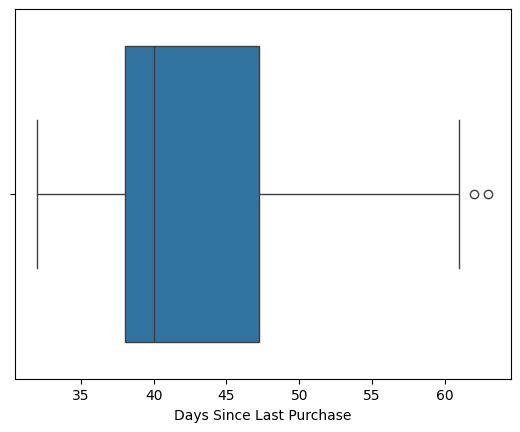

In [53]:
sn.boxplot( x = dados_unsatisfied['Days Since Last Purchase'])

In [54]:
dados_unsatisfied['Days Since Last Purchase'].min()

32

Assim, com o boxplot, fica mais fácil ver que temos 2 outliers, mas a média está em torno de 43, e encontramos uma boa parte dos dados nesse intervalo. Com isso e com o valor mínimo de 32 dias, podemos inferir que o erro/inconveniência para os clientes ocorreu no mês passado, o que limita nosso escopo de investigação para descobrir o que deu errado e como podemos melhorar. Se o problema foi no atendimento, no delivery, no produto distribuído neste mês, entre outros fatores. <br><br>Vamos tentar diminuir ainda mais a área de procura analisando em quais cidades temos esse problema.

In [55]:
dados_unsatisfied['City'].value_counts()

,count
City,
Chicago,58
Miami,58


<font color=gold>O maior problema, onde os clientes estão insatisfeitos, encontra-se nas cidades de Chicago e Miami. Em conclusão, até descobrirmos a causa do problema, não poderemos fidelizar novos clientes, pois corremos o risco de perder os atuais se o problema persistir. </font>

# <font color=green>Exportando os dados</font>

In [56]:
dados_limpos.to_excel('Dados_Limpos.xlsx', index = False)
df_age.to_excel('df_age_items_purchased.xlsx')
df_age_spending.to_excel('df_age_spending.xlsx')
media_idade_gender.to_excel('media_por_idade_genero.xlsx')
soma_por_genero.to_excel('soma_por_genero.xlsx')
df_gender_spend.to_excel('df_gender_spend.xlsx')
df_gender_purchased.to_excel('df_gender_purchased.xlsx')
media_idade_city.to_excel('media_idade_city.xlsx')
dados_cidades_soma.to_excel('dados_cidades_soma.xlsx')
df_city_itemns_purchased.to_excel('df_city_itemns_purchased.xlsx')
df_city_spend.to_excel('df_city_spend.xlsx')
dados_unsatisfied.to_excel('dados_unsatisfied.xlsx', index = False)
frequencia_Idade_gender.to_excel('frequencia_Idade_gender.xlsx')